<a href="https://colab.research.google.com/github/TanPMT/FlagDect/blob/tan/atnver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import pandas as pd
from PIL import Image



def extract_color_histogram(image, crop_box=(60, 116, 254, 218), bins=(8, 8, 8)):
    # Crop ảnh
    cropped_image = image[crop_box[1]:crop_box[3], crop_box[0]:crop_box[2]]
    # Chuyển đổi ảnh sau khi crop sang không gian màu RGB
    rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    # Tính toán histogram màu sắc
    hist = cv2.calcHist([rgb], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Chuẩn hóa histogram
    cv2.normalize(hist, hist)
    # Trả về histogram đã làm phẳng
    return hist.flatten()


def load_and_extract_features(data_path):
    features = []
    labels = []
    for idx, filename in enumerate(os.listdir(data_path)):

    # Kiểm tra xem tệp có phải là ảnh không
      if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp ảnh
        image_path = os.path.join(data_path, filename)
        label = filename.split(".")[0]
        # Đọc ảnh từ đường dẫn
        image = cv2.imread(image_path)


        # Tính đặc trưng của ảnh và thêm vào danh sách đặc trưng
        hist = extract_color_histogram(image)
            # if (label == 'Laos' or label == "Yemen" or label == "Vietnam" or label == "Japan" or label == "Jordan"):
        #   print(label)
        labels.append(label)
        features.append(hist)

    # Chuyển danh sách features và labels thành mảng numpy
    return np.array(features), np.array(labels)

In [3]:
train_path = "/gdrive/MyDrive/Dataset2/train"
valid_path = "/gdrive/MyDrive/Dataset2/valid"
#test_path = "/gdrive/MyDrive/Ảnh/test"
# image_path = "/gdrive/MyDrive/CS231.O21.2/Baitap/Baitap3/dogscats_small/train/cat.1.jpg"
# image = cv2.imread(image_path)
# cv2_imshow(image)
trainX, trainY = load_and_extract_features(train_path)
validX, validY = load_and_extract_features(valid_path)
#testX, testY = load_and_extract_features(test_path)

In [4]:
test_path = "/gdrive/MyDrive/Dataset2/test"
testX, testY = load_and_extract_features(test_path)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình KNN với số lượng láng giềng k=5 (có thể điều chỉnh)
model_2 = KNeighborsClassifier(n_neighbors=2)

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_2.fit(trainX, trainY)

# Đánh giá độ chính xác của mô hình trên tập validation
validAcc = model_2.score(validX, validY)
print("Accuracy of validation: ", validAcc)


Accuracy of validation:  0.5088408644400786


In [7]:
image_path = "/gdrive/MyDrive/Dataset/train/Vietnam.18.jpg"

image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model_2.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

AttributeError: 'NoneType' object has no attribute 'clip'

In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình LGBMClassifier
model = LGBMClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68243
[LightGBM] [Info] Number of data points in the train set: 3738, number of used features: 467
[LightGBM] [Info] Start training from score -3.819587
[LightGBM] [Info] Start training from score -3.844279
[LightGBM] [Info] Start training from score -3.869597
[LightGBM] [Info] Start training from score -3.844279
[LightGBM] [Info] Start training from score -3.895573
[LightGBM] [Info] Start training from score -3.844279
[LightGBM] [Info] Start training from score -4.006798
[LightGBM] [Info] Start training from score -4.099172
[LightGBM] [Info] Start training from score -3.922241
[LightGBM] [Info] Start training from score -3.844279
[LightGBM] [Info] Start training from score -3.869597
[LightGBM] [Info] Start training from score -3.895573
[LightGBM] [Info] Start training from score -4.099172
[LightGB

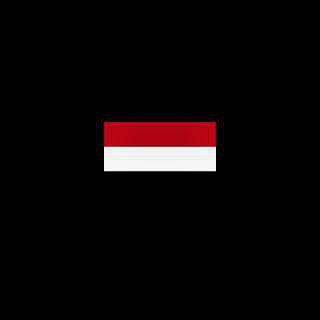

NameError: name 'model_ver2' is not defined

In [10]:
image_path = "/gdrive/MyDrive/Dataset/train/Yemen.2.jpg"

image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với số cây con là 100 (có thể điều chỉnh)
model = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với số cây con là 100 (có thể điều chỉnh)
model = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.9292730844793713


In [23]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Khởi tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi các nhãn từ chuỗi sang số nguyên
trainY_encoded = label_encoder.fit_transform(trainY)
validY_encoded = label_encoder.transform(validY)  # Chúng ta chỉ sử dụng transform ở đây vì đã fit trên trainY

# Khởi tạo mô hình XGBoost với các tham số tùy chỉnh (có thể điều chỉnh)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY_encoded là nhãn đã được chuyển đổi)
model.fit(trainX, trainY_encoded)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY_encoded, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.8821218074656189


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Naive Bayes (Gaussian Naive Bayes)
model = GaussianNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.7485265225933202


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Gradient Boosting
model = GradientBoostingClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.7642436149312377


In [24]:

from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()


# Khởi tạo mô hình Gradient Boosting


# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.06286836935166994


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình CatBoost
model = CatBoostClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Learning rate set to 0.084724
0:	learn: 3.7898371	total: 10.1s	remaining: 2h 48m 12s
1:	learn: 3.6796671	total: 20.1s	remaining: 2h 47m 16s
2:	learn: 3.5830755	total: 29.2s	remaining: 2h 41m 44s
3:	learn: 3.4893720	total: 39s	remaining: 2h 42m
4:	learn: 3.3961336	total: 43.4s	remaining: 2h 24m 4s
5:	learn: 3.3036151	total: 47.4s	remaining: 2h 10m 48s
6:	learn: 3.2460206	total: 53.4s	remaining: 2h 6m 15s
7:	learn: 3.1830503	total: 57.5s	remaining: 1h 58m 55s
8:	learn: 3.1108788	total: 1m 1s	remaining: 1h 52m 55s
9:	learn: 3.0715745	total: 1m 6s	remaining: 1h 49m 46s
10:	learn: 3.0115538	total: 1m 11s	remaining: 1h 47m 46s
11:	learn: 2.9718205	total: 1m 15s	remaining: 1h 44m 15s
12:	learn: 2.9277244	total: 1m 20s	remaining: 1h 41m 24s
13:	learn: 2.8884573	total: 1m 26s	remaining: 1h 41m 28s
14:	learn: 2.8557932	total: 1m 30s	remaining: 1h 38m 58s
15:	learn: 2.8027045	total: 1m 34s	remaining: 1h 36m 49s
16:	learn: 2.7576214	total: 1m 40s	remaining: 1h 36m 54s
17:	learn: 2.7303677	total: 1

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


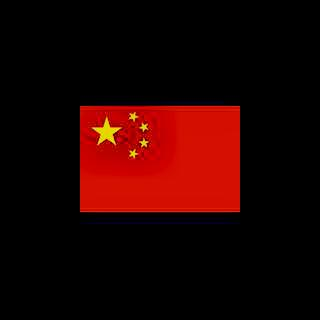

NameError: name 'bagging_model' is not defined

In [11]:
image_path = "/gdrive/MyDrive/Dataset/train/China.7.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = bagging_model.predict(hist)

# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
train_inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors='tf', max_length=128)
valid_inputs = tokenizer(valid_texts, padding=True, truncation=True, return_tensors='tf', max_length=128)

# Convert labels to tensors
train_labels_tensor = tf.convert_to_tensor(train_labels)
valid_labels_tensor = tf.convert_to_tensor(valid_labels)

# Load pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
history = model.fit(train_inputs, train_labels_tensor, validation_data=(valid_inputs, valid_labels_tensor), epochs=3, batch_size=32)

# Evaluate the model
valid_pred_probs = model.predict(valid_inputs)[0]
valid_pred_labels = tf.argmax(valid_pred_probs, axis=1)
valid_acc = accuracy_score(valid_labels, valid_pred_labels)
print("Accuracy on validation set:", valid_acc)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

NameError: name 'train_texts' is not defined

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Decision Tree
base_model = DecisionTreeClassifier()

# Khởi tạo mô hình Bagging với Decision Tree làm mô hình cơ sở
bagging_model = BaggingClassifier(base_model, n_estimators=120)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
bagging_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = bagging_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Bagging):", valid_acc)


Accuracy on validation set (Bagging): 0.9037328094302554


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest với 10 cây quyết định
rf_model = RandomForestClassifier(n_estimators=50)

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
rf_model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = rf_model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set (Random Forest):", valid_acc)


Accuracy on validation set (Random Forest): 0.8818897637795275


In [6]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
valid_pred = model.predict(validX)
# Tính toán các giá trị đánh giá
report = classification_report(validY, valid_pred)

# In ra báo cáo
print("Classification Report:")
print(report)


Classification Report:
                      precision    recall  f1-score   support

         Afghanistan       0.67      0.67      0.67         9
             Armenia       1.00      1.00      1.00         8
          Azerbaijan       1.00      1.00      1.00        11
             Bahrain       0.47      0.70      0.56        10
          Bangladesh       0.86      0.75      0.80         8
              Bhutan       1.00      1.00      1.00        11
              Brunei       1.00      1.00      1.00        12
            Cambodia       0.69      0.95      0.80        19
               China       0.57      0.92      0.71        13
              Cyprus       1.00      1.00      1.00         7
             Georgia       0.70      0.70      0.70        10
               India       1.00      1.00      1.00        12
           Indonesia       0.35      0.82      0.49        17
                Iran       0.86      0.60      0.71        10
                Iraq       0.27      0.57     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

# Dùng mô hình đã huấn luyện để dự đoán trên tập validation
#valid_pred = rf_model.predict(validX)
test_pred = rf_model.predict(testX)
# Tính toán các giá trị đánh giá
report = classification_report(testY, test_pred)

# In ra báo cáo
print("Classification Report:")
print(report)


NameError: name 'rf_model' is not defined

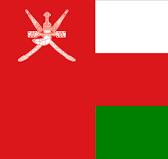

Accuracy: 1.0
Predicted label: ['Tajikistan']


In [8]:
image_path = "/gdrive/MyDrive/Code/oman.22.jpg"
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path)
cv2_imshow(image)
# Trích xuất đặc trưng từ ảnh
hist =  extract_color_histogram(image)

# Reshape đặc trưng để phù hợp với mô hình
hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
predicted_label = model.predict(hist)
probabilities = model.predict_proba(hist)

# Tìm chỉ mục của nhãn được dự đoán trong danh sách nhãn của mô hình
label_index = np.where(model.classes_ == predicted_label)[0][0]

# In độ chính xác cho nhãn được dự đoán
print("Accuracy:", probabilities[0][label_index])
# In kết quả dự đoán
print("Predicted label:", predicted_label)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Decision Tree
model = DecisionTreeClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.630648330058939


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


def frame_to_image(frame_data):
    # Decode base64 image
    image_bytes = b64decode(frame_data.split(',')[1])
    # Convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # Decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Sử dụng hàm frame_to_image để chuyển đổi kiểu dữ liệu của biến frame






In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    hist =  extract_color_histogram(frame)

# Reshape đặc trưng để phù hợp với mô hình
    hist = hist.reshape(1,-1)

# Dự đoán nhãn của ảnh
    predicted_label = rf_model.predict(hist)

# In kết quả dự đoán
    print("Predicted label:", predicted_label)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình SVM (Support Vector Machine)
model = SVC()

# Huấn luyện mô hình trên dữ liệu huấn luyện (trainX là các đặc trưng, trainY là nhãn)
model.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu validation
valid_pred = model.predict(validX)

# Đánh giá độ chính xác của mô hình trên tập validation
valid_acc = accuracy_score(validY, valid_pred)
print("Accuracy on validation set:", valid_acc)


Accuracy on validation set: 0.45866141732283466
